## **Stock Market News Sentiment Analysis and Summarization**

### Business Context

The prices of the stocks of companies listed under a global exchange are influenced by a variety of factors, with the company's financial performance, innovations and collaborations, and market sentiment being factors that play a significant role. News and media reports can rapidly affect investor perceptions and, consequently, stock prices in the highly competitive financial industry. With the sheer volume of news and opinions from a wide variety of sources, investors and financial analysts often struggle to stay updated and accurately interpret its impact on the market. As a result, investment firms need sophisticated tools to analyze market sentiment and integrate this information into their investment strategies.

### Problem Definition

With the increasing volume of news articles and opinions, an investment startup seeks to harness artificial intelligence to tackle the challenge of interpreting stock-related news and its influence on stock prices. They have gathered historical daily news for a specific NASDAQ-listed company, alongside data on its daily stock prices and trading volumes.

As a member of the startup's Data Science and AI team, the role involves analyzing data and developing an AI-driven sentiment analysis system. The system will automatically process and analyze news articles to assess market sentiment while summarizing the news on a weekly basis to enhance the accuracy of stock price predictions and optimize investment strategies. By doing so, it will equip financial analysts with actionable insights, facilitating more informed investment decisions and improving client outcomes.

### Data Dictionary

* `Date` : The date the news was released
* `News` : The content of news articles that could potentially affect the company's stock price
* `Open` : The stock price (in \$) at the beginning of the day
* `High` : The highest stock price (in \$) reached during the day
* `Low` :  The lowest stock price (in \$) reached during the day
* `Close` : The adjusted stock price (in \$) at the end of the day
* `Volume` : The number of shares traded during the day
* `Label` : The sentiment polarity of the news content
    * 1: positive
    * 0: neutral
    * -1: negative

## **Installing and Importing Necessary Libraries**

In [ ]:
# installing the sentence-transformers and gensim libraries for word embeddings
!pip install -U sentence-transformers gensim transformers tqdm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 16.0 MB/s eta 0:00:00


In [ ]:
# To manipulate and analyze data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To used time-related functions
import time

# To parse JSON data
import json

# To build, tune, and evaluate ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# To load/create word embeddings
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# To work with transformer models
import torch
from sentence_transformers import SentenceTransformer

# To implement progress bar related functionalities
from tqdm import tqdm
tqdm.pandas()

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


### **Loading the dataset**

In [ ]:
# Setting google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/MLProject_6/'

In [ ]:
data = pd.read_csv(file_path + 'stock_news.csv')
stock = data.copy()

## **Data Overview**

#### **Checking first few rows and the shape of the the dataset.**

In [ ]:
# Top 5 rows of the dataset
stock.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


In [ ]:
# shape of the datafile
stock.shape

(349, 8)

#### **Checking the datatypes and check if any of the columns need to convert into appropriate datatypes.**

In [ ]:
# Check the data types
stock.dtypes

,0
Date,object
News,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Label,int64


The column 'Date' is in the object type that needs to be converted into datetime type for further analysis.

In [ ]:
# Convert the 'Date' column in the 'stock' DataFrame to datetime format
stock['Date'] = pd.to_datetime(stock['Date'])

#### **Checking any missing values or any duplicated records**

In [ ]:
# Checking for missing values in the data
stock.isnull().sum()

,0
Date,0
News,0
Open,0
High,0
Low,0
Close,0
Volume,0
Label,0


In [ ]:
# Checking the duplicate values
stock.duplicated().sum()

0

No duplicates and No missing values were observed.

## **Exploratory Data Analysis**

### **Univariate Analysis**

#### **Observation on Label**

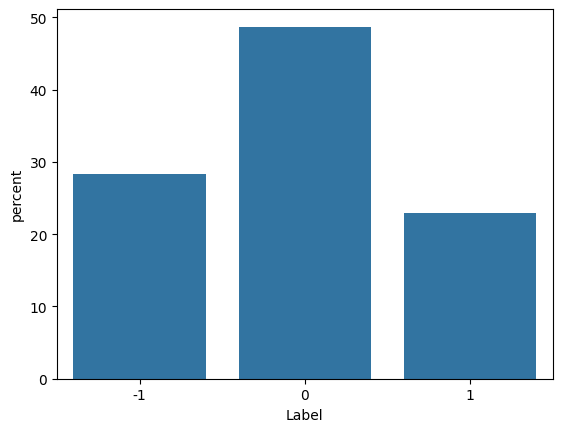

In [ ]:
# Plot the sentiment in terms of percentages in the dataset
sns.countplot(data=stock, x="Label", stat="percent");

#### Observations:
- The category 0 (neutral) has the highest percentage of observations, followed by -1 (negative) and then 1 (postitive).
- There is a significant difference in the percentages between the categories, particularly between 0 and 1.
- The distribution is not uniform, indicating that the categories are not equally represented in the data.

#### **Observation on Price(Open, High, Low, Close)**

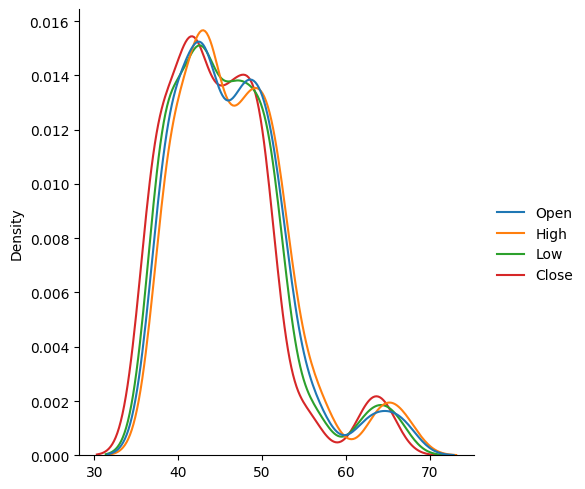

In [ ]:
# Plot a density plot of ["Open","High","Low","Close"] all in a single plot
sns.displot(data=stock[["Open","High","Low","Close"]], kind="kde", palette="tab10");

- All four variables have similar bell-shaped distributions.
- The means of the distributions appear to be close together.
- The variances of the distributions differ. The Close prices are more spread out than the Open prices.
- The distributions are slightly skewed to the right on all four variables and are overlaping to some extent, suggesting that the variables are correlated to each other.

#### **Observations on Volume**

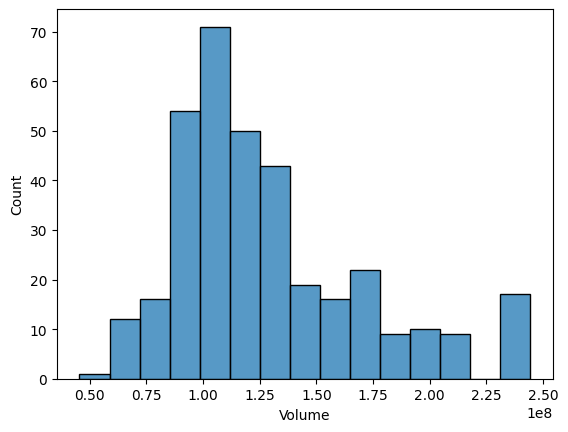

In [ ]:
# Plot a histogram of Volume
sns.histplot(stock, x='Volume');

The histogram of the "Volume" shows has a bell-shaped curve, a normal distribution. The peak of the distribution is around 1.00e8, indicating that this is the most common volume in the data. The distribution is relatively symmetric, with a slight skew to the right. The tails of the distribution are thin, showing that extreme values are less common.

#### **Observations on News length**

In [ ]:
#Calculating the total number of words present in the news content.
stock['news_len'] = stock['News'].apply(lambda x: len(x.split(' ')))

# Print the statistical summary for the news content length
stock['news_len'].describe()

,news_len
count,349.000000
mean,49.312321
std,5.727770
min,19.000000
25%,46.000000
50%,50.000000
75%,53.000000
max,61.000000


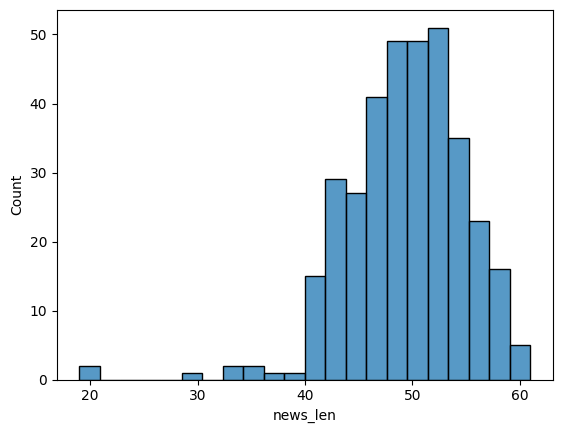

In [ ]:
# Plot a histogram of news_len column
sns.histplot(data = stock, x="news_len");

The histogram illustrates the distribution of word counts (referred to as news_len) across the news content.

- The distribution is right-skewed, with the majority of the word counts centered between 40 to 55 words.

- The highest frequency of news articles have a word count between 45 to 55 words, with the peak count occurring around 50 words.

- There are a few entries on the left side of the distribution with significantly lower word counts, around 20 to 30 words, which may represent shorter news.

- The bulk of the news content appears to be relatively consistent in length, with a focus around 45-55 words, suggesting that most articles are of medium length.

### **Bivariate Analysis**

### Bivariate Analysis

* Correlation
* Sentiment Polarity vs Price and Volume
* Date vs Price and Volume

#### **Correlation**

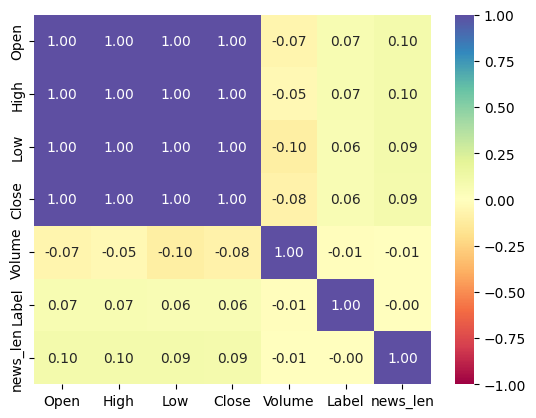

In [ ]:
sns.heatmap(stock.select_dtypes(include=['float64', 'int64']).corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

- The stock price variables (Open, High, Low, Close) are perfectly correlated, indicating potential redundancy or interdependence in the data.
- The length of the news does not seem to have a strong correlation with either stock prices or the trading volume, suggesting that the length of news articles might not be a major predictor of price movements or trading activity.

#### **Label vs Prices (Open, High, Low, Close)**

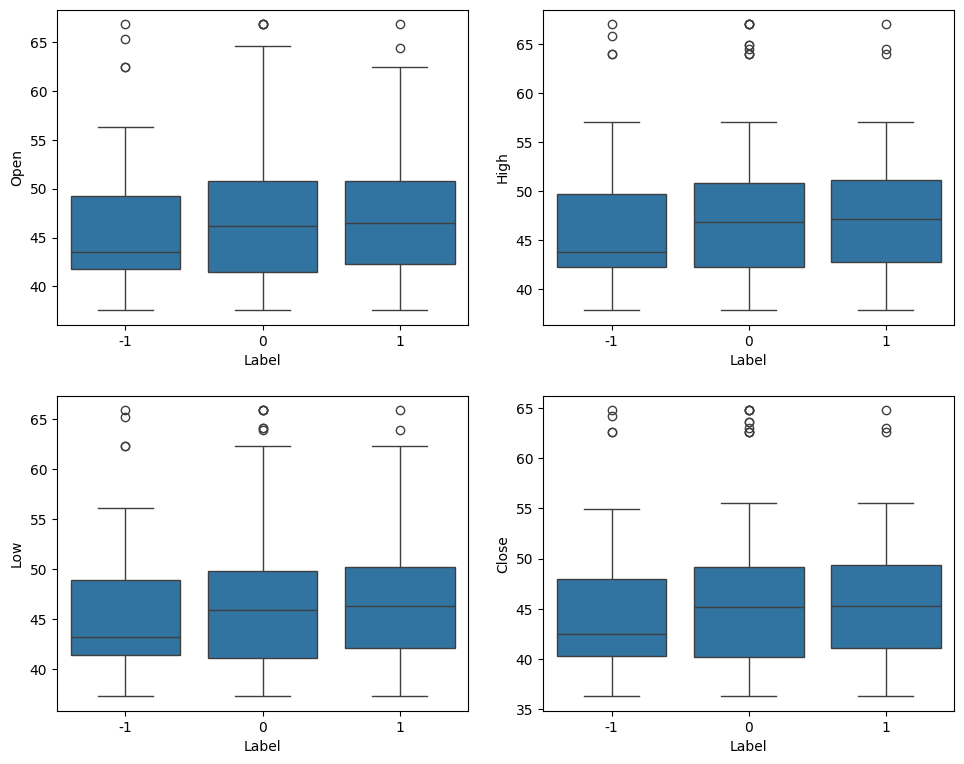

In [ ]:
plt.figure(figsize=(10, 8))

for i, variable in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=stock, x="Label", y=variable)
    plt.tight_layout(pad=2)

plt.show()

- There appear to be no significant difference in the distribution of stock prices (Open, High, Low, and Close) across the labels (-1, 0, 1).
- The labels may not be directly related to large shifts in the stock prices. There may be other factors influencing the labels and price movements.
- The presence of outliers may indicate isolated instances of extreme price changes.

#### **Label vs Volume**

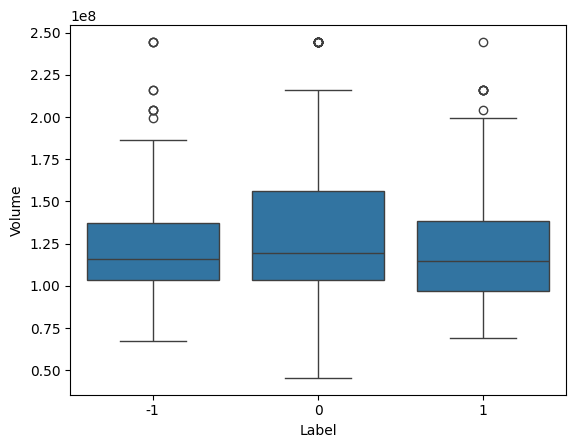

In [ ]:
# Boxplot of Label vs Volume
sns.boxplot(data=stock, x="Label", y="Volume");

- The boxplot of the "Volume" by "Labels" shows that the median volume for all the labels is similar, with the median for label 0 being slightly higher than the medians for labels -1 and 1.
- The interquartile range (IQR) for label 0 is also slightly larger than the IQRs for labels -1 and 1, indicating the data for label 0 is more spread out.

#### **Date vs Price (Open, High, Low, Close)**

In [ ]:
stock_daily = stock.groupby('Date').agg(
    {
        'Open': 'mean',
        'High': 'mean',
        'Low': 'mean',
        'Close': 'mean',
        'Volume': 'mean',
    }
).reset_index()  # Group the 'stocks' DataFrame by the 'Date' column

stock_daily.set_index('Date', inplace=True)
stock_daily.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,41.740002,42.244999,41.482498,40.246914,130672400.0
2019-01-03,43.570000,43.787498,43.222500,42.470604,103544800.0
2019-01-04,47.910000,47.919998,47.095001,46.419842,111448000.0
2019-01-07,50.792500,51.122501,50.162498,49.110790,109012000.0
2019-01-08,53.474998,54.507500,51.685001,50.787209,216071600.0


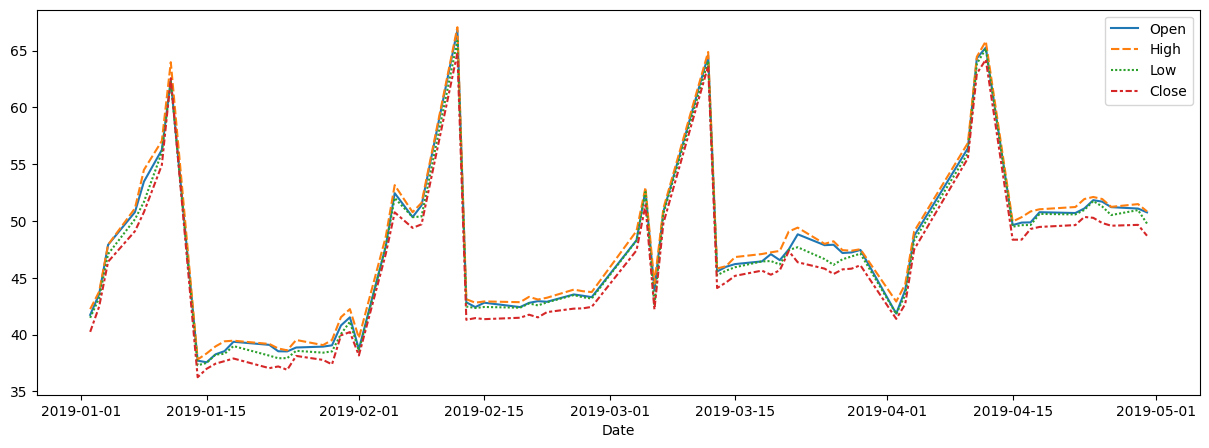

In [ ]:
# Lineplot of all the variables except Volume
plt.figure(figsize=(15,5))
sns.lineplot(stock_daily.drop("Volume", axis=1));

- It can be seen that the values of all four price variables fluctuate over time, with the "High" and "Low" being the most volatile. The "Open" and "Close" prices are generally closer to each other than the "High" and "Low" prices, indicating that the stock price tends to open and close near its daily high or low.
- There appears to be a general upward trend in the values of all price variables over the time period provided in the dataset.

#### **Date vs Volume and Close Price**

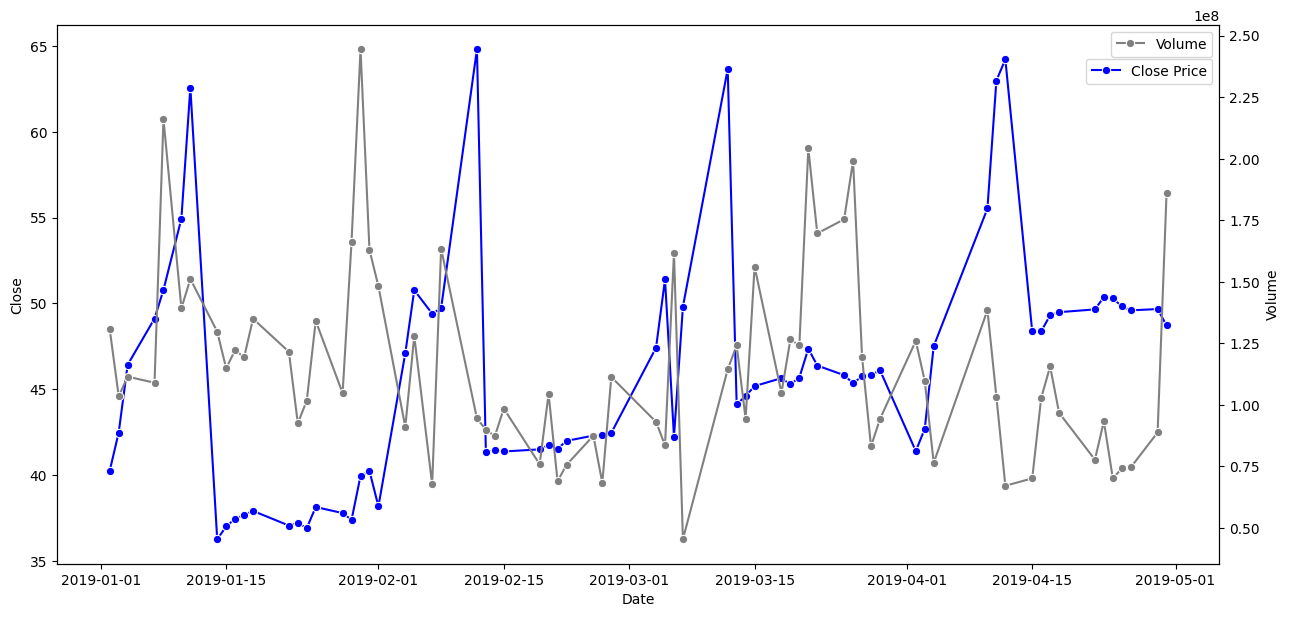

In [ ]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(15,7))

# Lineplot on primary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Close', ax=ax1, color='blue', marker='o', label='Close Price')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Lineplot on secondary y-axis
sns.lineplot(data=stock_daily.reset_index(), x='Date', y='Volume', ax=ax2, color='gray', marker='o', label='Volume')

ax1.legend(bbox_to_anchor=(1,0.95));

- The line chart of the "Volume" and "Close Price" shows that the "Close Price" fluctuates over time, with periods of upward and downward trends.
- The "Volume" also fluctuates, with peaks and troughs that do not always correspond to the peaks and troughs of the "Close Price".
- There appears to be a general upward trend in the "Close Price" variable over time.

## **Data Preprocessing**

In [ ]:
# Statistical summary of the 'Date'
stock["Date"].describe()

,Date
count,349
mean,2019-02-16 16:05:30.085959936
min,2019-01-02 00:00:00
25%,2019-01-14 00:00:00
50%,2019-02-05 00:00:00
75%,2019-03-22 00:00:00
max,2019-04-30 00:00:00


- There are 349 entries in the dataset, indicating a substantial amount of stock news data available for analysis.
- The start of the data collection date is January 2, 2019, and the end date is April 30, 2019.
- The dataset captures news over a span of approximately four months, with data points more densely populated around late January and February.
- There is a notable spread of dates, with the majority of entries falling between January and April 2019.

- The understanding of the distribution of the news dates is guiding us in splitting of the dataset for analysis.

### **Train-Validation-Test Split**

To analyze the stock news data, we will perform a train-test split based on date to maintain the temporal sequence. The dataset will be divided so that the training set includes the oldest data, followed by the validation set, while the most recent data will be allocated to the test set.

In [ ]:
# Selecting all rows where the 'Date' is before '2019-04-01'
X_train = stock[(stock['Date'] < '2019-04-01')].reset_index()

# Selecting all rows where the 'Date' is from '2019-04-01' to '2019-04-16' (excluded)
X_val = stock[(stock['Date'] >= '2019-04-01') & (stock['Date'] < '2019-04-16')].reset_index()

# Selecting all rows where the 'Date' is from '2019-04-16' till the end
X_test = stock[stock['Date'] >= '2019-04-16'].reset_index()


In [ ]:
# Picking the 'Label' column as the target variable
y_train = X_train["Label"].copy()
y_val = X_val["Label"].copy()
y_test = X_test["Label"].copy()

In [ ]:
#Checking shape of X_train,X_val,X_test,y_train,y_val and y_test
print("Train data shape",X_train.shape)
print("Validation data shape",X_val.shape)
print("Test data shape ",X_test.shape)

print("Train label shape",y_train.shape)
print("Validation label shape",y_val.shape)
print("Test label shape ",y_test.shape)

Train data shape (286, 10)
Validation data shape (21, 10)
Test data shape  (42, 10)
Train label shape (286,)
Validation label shape (21,)
Test label shape  (42,)


### **Word Embeddings**

#### **Word2Vec**

In [ ]:
# Creating a list of all words in the data
words_list = [item.split(" ") for item in stock['News'].values]

In [ ]:
# Creating an instance of Word2Vec
vec_size = 300
model_W2V = Word2Vec(words_list, vector_size = vec_size, min_count = 1, window=5, workers = 6)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(list(model_W2V.wv.key_to_index)))

Length of the vocabulary is 4682


Let's check out a few word embeddings obtained using the model.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
model_W2V.wv[word]

array([-3.92932352e-03,  3.76504697e-02,  8.18982441e-03,  1.14476793e-02,
        1.08615751e-03, -5.69216684e-02,  2.88204122e-02,  8.76035616e-02,
        3.87263158e-03, -2.19606236e-02,  6.05234969e-03, -2.07445547e-02,
       -4.68905224e-03,  1.49068609e-02, -2.55884435e-02, -2.69003175e-02,
        2.28900686e-02, -4.05632658e-03,  6.41069142e-03, -2.51552258e-02,
       -2.29388084e-02,  8.02220870e-03,  2.94082873e-02,  1.50989546e-02,
        2.40729991e-02,  5.94967103e-04, -3.55441384e-02,  8.56987573e-03,
       -2.85438485e-02, -4.11274470e-02,  1.03314640e-02, -2.71410476e-02,
        4.78495797e-03, -9.06613655e-03, -1.73088256e-03,  2.33320352e-02,
        1.24230701e-02, -3.41712907e-02, -2.69887014e-03, -1.24847647e-02,
       -1.97687168e-02,  3.90771264e-03,  2.14276180e-04, -2.04706304e-02,
        1.99120846e-02,  3.80338244e-02,  8.69419612e-03,  1.75244287e-02,
        2.26525794e-04,  2.32253373e-02,  1.18792737e-02, -9.65107046e-03,
       -2.07593460e-02,  

In [ ]:
# Checking the word embedding of a random word
word = "economy"
model_W2V.wv[word]

array([-1.14581466e-03,  5.27440477e-03,  3.23281507e-03,  1.91844651e-03,
       -1.15706981e-03, -1.14229936e-02,  6.74056308e-03,  1.57488212e-02,
       -1.95581885e-03, -2.20578443e-03, -2.42058909e-03, -3.48134129e-03,
        7.79400347e-04, -2.82470370e-04, -4.25111083e-03, -1.79142877e-03,
        7.23549817e-03,  1.88894861e-03,  3.70431528e-03, -2.78864568e-03,
       -5.84183400e-03,  2.80985539e-03,  3.97856534e-03, -7.79099122e-04,
        1.24728645e-03, -1.22914382e-03, -7.19821267e-03,  2.29437323e-03,
       -6.64608413e-03, -9.72573925e-03, -1.91700389e-03, -6.57328265e-03,
        2.93148169e-03, -2.75105960e-03, -2.67417543e-03,  5.93988411e-03,
       -1.39114592e-04, -5.40853711e-03, -9.01478852e-05, -2.98576080e-03,
       -5.74369682e-03,  8.16748710e-04,  1.46817963e-03, -3.89714306e-03,
        3.94319464e-03,  3.88290803e-03, -6.22862019e-04,  1.12363230e-03,
       -2.24736814e-05,  1.02810829e-03,  4.68003005e-03, -4.22795676e-03,
       -4.13380936e-03,  

In [ ]:
# Retrieving the words present in the Word2Vec model's vocabulary
words = list(model_W2V.wv.key_to_index.keys())

# Retrieving word vectors for all the words present in the model's vocabulary
wvs = model_W2V.wv[words].tolist()

# Creating a dictionary of words and their corresponding vectors
word_vector_dict = dict(zip(words, wvs))

In [ ]:
def average_vectorizer_Word2Vec(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

X_train_wv = pd.DataFrame(X_train["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_wv = pd.DataFrame(X_val["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_wv = pd.DataFrame(X_test["News"].apply(average_vectorizer_Word2Vec).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  0.5553107261657715


In [ ]:
print(X_train_wv.shape, X_val_wv.shape, X_test_wv.shape)

(286, 300) (21, 300) (42, 300)


### GloVe

In [ ]:
# load the Stanford GloVe model
filename = file_path + 'glove.6B.100d.txt.word2vec'
glove_model = KeyedVectors.load_word2vec_format(filename, binary=False)

In [ ]:
# Checking the size of the vocabulary
print("Length of the vocabulary is", len(glove_model.index_to_key))

Length of the vocabulary is 400000


Let's check out a few word embeddings.

In [ ]:
# Checking the word embedding of a random word
word = "stock"
glove_model[word]

array([ 8.6341e-01,  6.9648e-01,  4.5794e-02, -9.5708e-03, -2.5498e-01,
       -7.4666e-01, -2.2086e-01, -4.4615e-01, -1.0423e-01, -9.9931e-01,
        7.2550e-02,  4.5049e-01, -5.9912e-02, -5.7837e-01, -4.6540e-01,
        4.3429e-02, -5.0570e-01, -1.5442e-01,  9.8250e-01, -8.1571e-02,
        2.6523e-01, -2.3734e-01,  9.7675e-02,  5.8588e-01, -1.2948e-01,
       -6.8956e-01, -1.2811e-01, -5.2265e-02, -6.7719e-01,  3.0190e-02,
        1.8058e-01,  8.6121e-01, -8.3206e-01, -5.6887e-02, -2.9578e-01,
        4.7180e-01,  1.2811e+00, -2.5228e-01,  4.9557e-02, -7.2455e-01,
        6.6758e-01, -1.1091e+00, -2.0493e-01, -5.8669e-01, -2.5375e-03,
        8.2777e-01, -4.9102e-01, -2.6475e-01,  4.3015e-01, -2.0516e+00,
       -3.3208e-01,  5.1845e-02,  5.2646e-01,  8.7452e-01, -9.0237e-01,
       -1.7366e+00, -3.4727e-01,  1.6590e-01,  2.7727e+00,  6.5756e-02,
       -4.0363e-01,  3.8252e-01, -3.0787e-01,  5.9202e-01,  1.3468e-01,
       -3.3851e-01,  3.3646e-01,  2.0950e-01,  8.5905e-01,  5.18

In [ ]:
# Checking the word embedding of a random word
word = "economy"
glove_model[word]

array([-0.19382  ,  1.017    ,  1.076    ,  0.02954  , -0.39192  ,
       -1.3891   , -0.87873  , -0.63162  ,  0.9643   , -0.43035  ,
       -0.34868  ,  0.22736  , -0.40296  ,  0.15641  , -0.16813  ,
       -0.15343  , -0.15799  , -0.27612  ,  0.18088  , -0.28386  ,
        0.49847  ,  0.29864  ,  0.32353  ,  0.18108  , -0.59623  ,
       -0.54165  , -0.70019  , -0.64956  , -0.69063  ,  0.18084  ,
       -0.38581  ,  0.56086  , -0.40313  , -0.38777  , -0.70615  ,
        0.20657  ,  0.34171  , -0.23393  , -0.35882  , -0.2201   ,
       -0.76182  , -1.2047   ,  0.4339   ,  1.1656   ,  0.1836   ,
       -0.21601  ,  0.93198  , -0.059616 , -0.11624  , -1.3259   ,
       -0.79772  , -0.0074957, -0.0889   ,  1.4749   ,  0.31157  ,
       -2.2952   , -0.058351 ,  0.39353  ,  1.4983   ,  0.74023  ,
       -0.20109  ,  0.098124 , -0.73081  , -0.32294  ,  0.16703  ,
        0.87431  , -0.041624 , -0.51022  ,  1.0737   , -0.4257   ,
        1.0581   ,  0.19859  , -0.60087  , -0.33906  ,  0.6024

In [ ]:
# Retrieving the words present in the GloVe model's vocabulary
glove_words = glove_model.index_to_key

# Creating a dictionary of words and their corresponding vectors
glove_word_vector_dict = dict(zip(glove_model.index_to_key,list(glove_model.vectors)))

In [ ]:
vec_size=100

In [ ]:
def average_vectorizer_GloVe(doc):
    # Initializing a feature vector for the sentence
    feature_vector = np.zeros((vec_size,), dtype="float64")

    # Creating a list of words in the sentence that are present in the model vocabulary
    words_in_vocab = [word for word in doc.split() if word in glove_words]

    # adding the vector representations of the words
    for word in words_in_vocab:
        feature_vector += np.array(glove_word_vector_dict[word])

    # Dividing by the number of words to get the average vector
    if len(words_in_vocab) != 0:
        feature_vector /= len(words_in_vocab)

    return feature_vector

In [ ]:
# creating a dataframe of the vectorized documents
start = time.time()

# Apply GloVe on 'News' column
X_train_gl = pd.DataFrame(X_train["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_val_gl = pd.DataFrame(X_val["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])
X_test_gl = pd.DataFrame(X_test["News"].apply(average_vectorizer_GloVe).tolist(), columns=['Feature '+str(i) for i in range(vec_size)])

end = time.time()
print('Time taken ', (end-start))

Time taken  32.60706925392151


In [ ]:
# Shapes of the final dataframes
print(X_train_gl.shape, X_val_gl.shape, X_test_gl.shape)

(286, 100) (21, 100) (42, 100)


### Sentence Transformer

#### Defining the model

In [ ]:
#Defining the model
model_st = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#### Encoding the dataset

In [ ]:
# Setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
start = time.time()

# Applying Sentence Transformer on 'News' column
X_train_st = model_st.encode(X_train["News"].values, show_progress_bar=True, device=device)
X_val_st = model_st.encode(X_val["News"].values, show_progress_bar=True, device=device)
X_test_st = model_st.encode(X_test["News"].values, show_progress_bar=True, device=device)

end = time.time()
print("Time taken ",(end-start))

Batches:   0%|          | 0/9 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Time taken  1.6351685523986816


In [ ]:
# Print the shapes of the datasets from Sentence Transformer
print(X_train_st.shape, X_val_st.shape, X_test_st.shape)

(286, 384) (21, 384) (42, 384)


- Each news content has been converted to a 384-dimensional vector.

## **Sentiment Analysis**

#### **Model Evaluation Criterion**

### Utility Functions

In [ ]:
def model_performance_classification_sklearn(model, predictors, target):
    """
    Compute various performance metrics for a classification model using sklearn.

    Parameters:
    model (sklearn classifier): The classification model to evaluate.
    predictors (array-like): The independent variables used for predictions.
    target (array-like): The true labels for the dependent variable.

    Returns:
    pandas.DataFrame: A DataFrame containing the computed metrics (Accuracy, Recall, Precision, F1-score).
    """

    # Make predictions using the classifier.
    pred = model.predict(predictors)

    # Computing Accuracy, Recall, Precision, and F1-Score
    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred,average='weighted')
    precision = precision_score(target, pred,average='weighted')
    f1 = f1_score(target, pred,average='weighted')

    # Create a DataFrame to store the computed metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1": [f1],
        }
    )

    # DataFrame with the metrics.
    return df_perf

In [ ]:
# Function to plot confusion matrices side by side with custom tick labels
def plot_confusion_matrices(y_train_true, y_train_pred, y_val_true, y_val_pred, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns for train and validation

    # Define the labels for the confusion matrix.
    label_list = [1, 0, -1]  # The class labels (Positive, Neutral, Negative)
    tick_labels = ['Positive', 'Neutral', 'Negative']  # Custom tick labels

    # Training Confusion Matrix
    cm_train = confusion_matrix(y_train_true, y_train_pred, labels=label_list)
    sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=tick_labels, yticklabels=tick_labels)
    axes[0].set_title(f"{model_name} - Training Confusion Matrix")
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # Validation Confusion Matrix
    cm_val = confusion_matrix(y_val_true, y_val_pred, labels=label_list)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=tick_labels, yticklabels=tick_labels)
    axes[1].set_title(f"{model_name} - Validation Confusion Matrix")
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()


### Base Model - Word2Vec

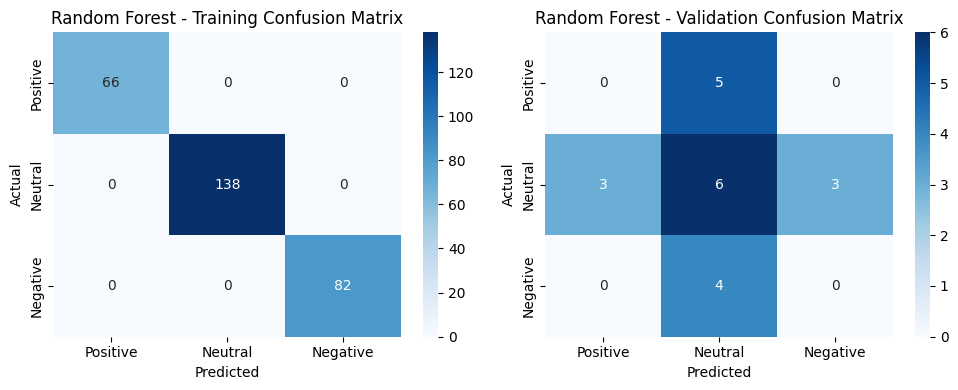

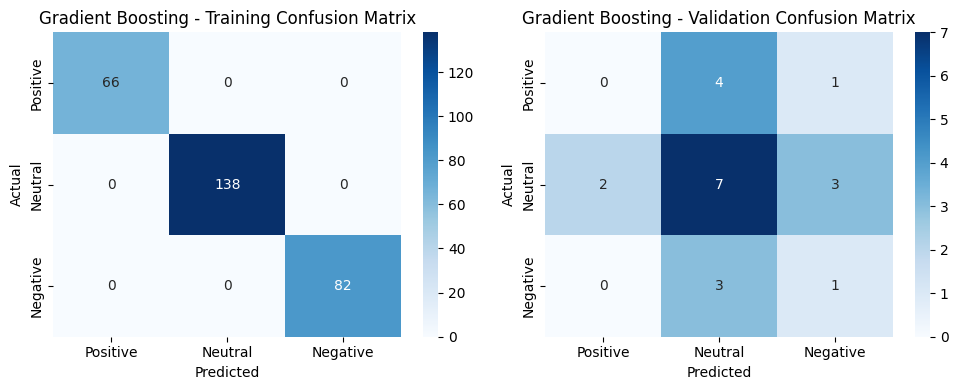

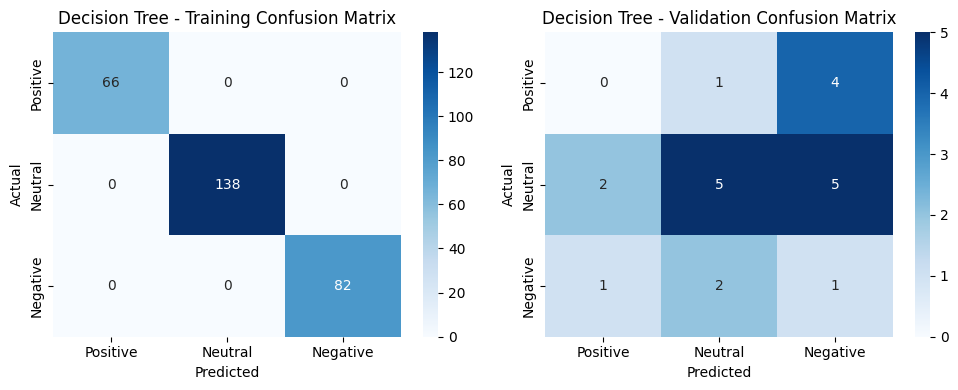

In [ ]:
# Building models
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Random Forest", RandomForestClassifier(random_state=42)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=42)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=42)))


# Lists to store metrics
training_scores = []
validation_scores = []

# Training and Validation performance
for name, model in models:
    # Train the model
    model.fit(X_train_wv, y_train)

    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train_wv)
    y_val_pred = model.predict(X_val_wv)

    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    training_scores.append((name, train_accuracy, train_precision, train_recall, train_f1))

    # Validation metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    validation_scores.append((name, val_accuracy, val_precision, val_recall, val_f1))

    # Plot confusion Matrix for each model
    plot_confusion_matrices(y_train, y_train_pred, y_val, y_val_pred, name)



In [ ]:
# Convert metrics to DataFrame
train_df_wv = pd.DataFrame(training_scores, columns=["Model", "Train Accuracy", "Train Precision", "Train Recall", "Train F1"])
val_df_wv = pd.DataFrame(validation_scores, columns=["Model", "Val Accuracy", "Val Precision", "Val Recall", "Val F1"])

# Display metrics
print("Word2Vec Training Metrics:\n", train_df_wv)
print("\nWord2Vec Validation Metrics:\n", val_df_wv)


Word2Vec Training Metrics:
                Model  Train Accuracy  Train Precision  Train Recall  Train F1
0      Random Forest             1.0              1.0           1.0       1.0
1  Gradient Boosting             1.0              1.0           1.0       1.0
2      Decision Tree             1.0              1.0           1.0       1.0

Word2Vec Validation Metrics:
                Model  Val Accuracy  Val Precision  Val Recall    Val F1
0      Random Forest      0.285714       0.228571    0.285714  0.253968
1  Gradient Boosting      0.380952       0.323810    0.380952  0.350020
2      Decision Tree      0.285714       0.376190    0.285714  0.312925


### Base Model - GloVe

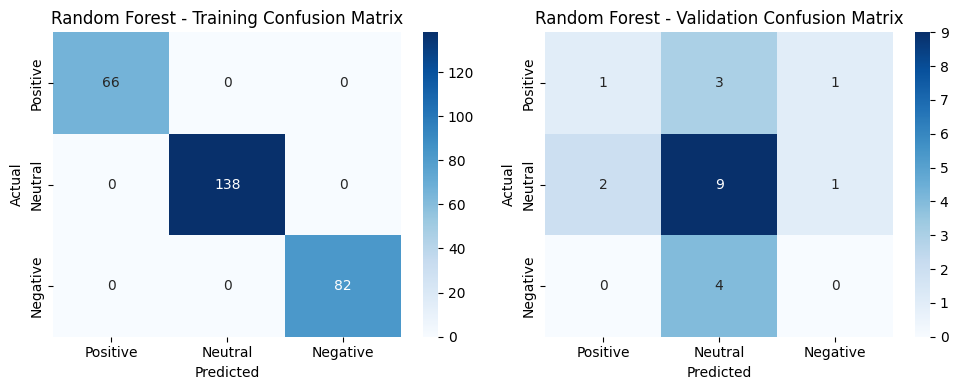

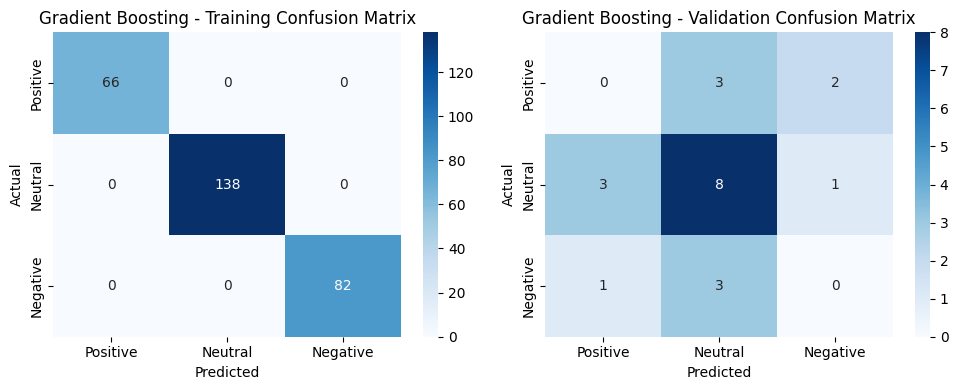

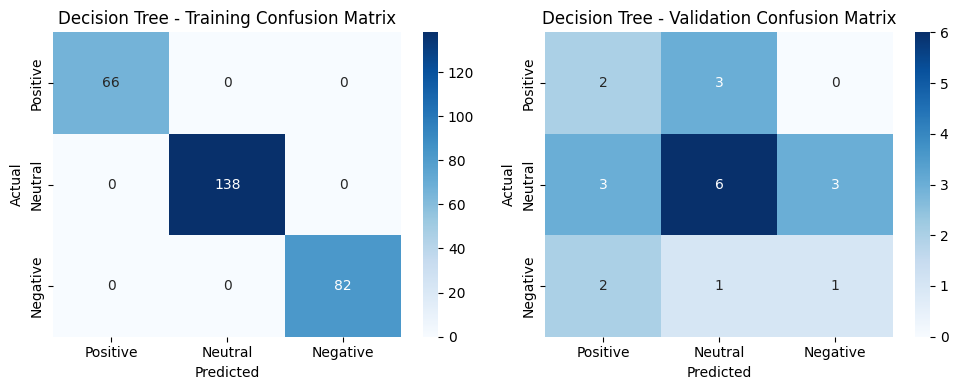

In [ ]:
# Building models
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Random Forest", RandomForestClassifier(random_state=42)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=42)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=42)))


# Lists to store metrics
training_scores = []
validation_scores = []

# Training and Validation performance
for name, model in models:
    # Train the model
    model.fit(X_train_gl, y_train)

    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train_gl)
    y_val_pred = model.predict(X_val_gl)

    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    training_scores.append((name, train_accuracy, train_precision, train_recall, train_f1))

    # Validation metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    validation_scores.append((name, val_accuracy, val_precision, val_recall, val_f1))

    # Plot confusion Matrix for each model
    plot_confusion_matrices(y_train, y_train_pred, y_val, y_val_pred, name)



In [ ]:
# Convert metrics to DataFrame
train_df_gl = pd.DataFrame(training_scores, columns=["Model", "Train Accuracy", "Train Precision", "Train Recall", "Train F1"])
val_df_gl = pd.DataFrame(validation_scores, columns=["Model", "Val Accuracy", "Val Precision", "Val Recall", "Val F1"])

# Display metrics
print("GloVe Training Metrics:\n", train_df_gl)
print("\nGloVe Validation Metrics:\n", val_df_gl)


GloVe Training Metrics:
                Model  Train Accuracy  Train Precision  Train Recall  Train F1
0      Random Forest             1.0              1.0           1.0       1.0
1  Gradient Boosting             1.0              1.0           1.0       1.0
2      Decision Tree             1.0              1.0           1.0       1.0

GloVe Validation Metrics:
                Model  Val Accuracy  Val Precision  Val Recall    Val F1
0      Random Forest      0.476190       0.400794    0.476190  0.426871
1  Gradient Boosting      0.380952       0.326531    0.380952  0.351648
2      Decision Tree      0.428571       0.458503    0.428571  0.438672


### Base Model - Sentence Transformer

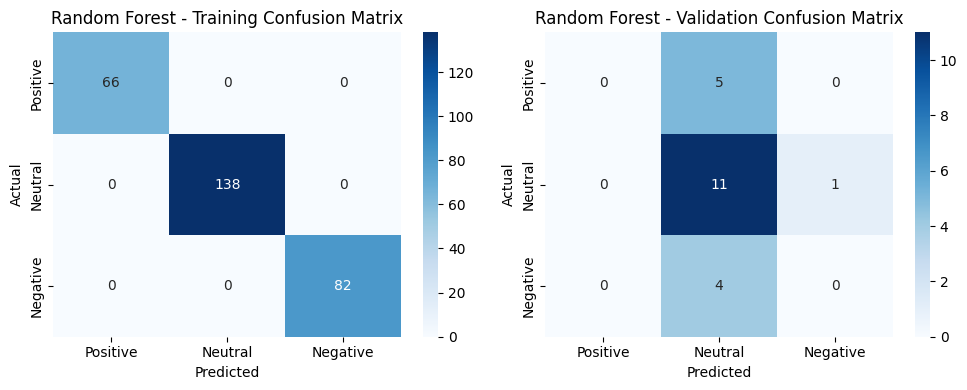

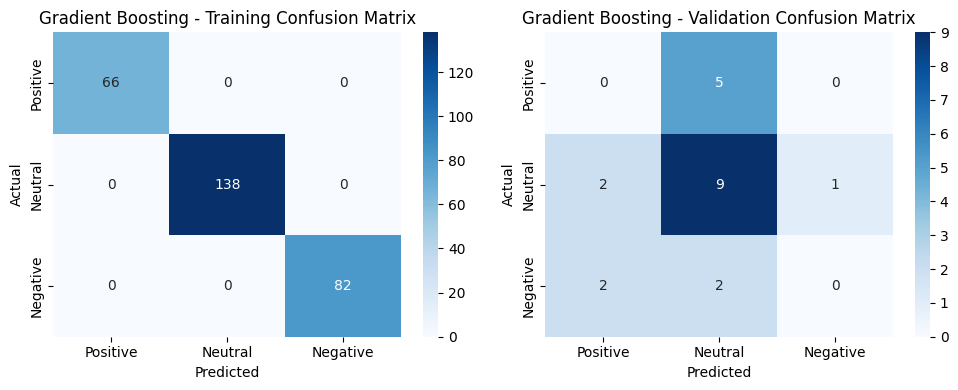

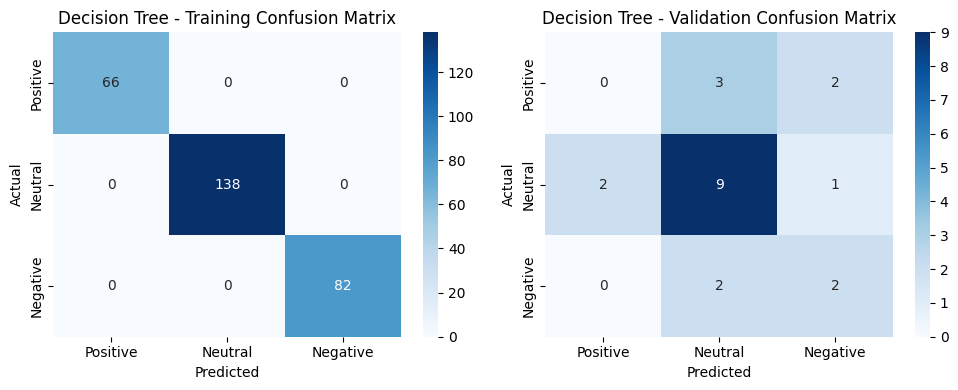

In [ ]:
# Building models
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Random Forest", RandomForestClassifier(random_state=42)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=42)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=42)))


# Lists to store metrics
training_scores = []
validation_scores = []

# Training and Validation performance
for name, model in models:
    # Train the model
    model.fit(X_train_st, y_train)

    # Predictions on training and validation sets
    y_train_pred = model.predict(X_train_st)
    y_val_pred = model.predict(X_val_st)

    # Training metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    training_scores.append((name, train_accuracy, train_precision, train_recall, train_f1))

    # Validation metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    validation_scores.append((name, val_accuracy, val_precision, val_recall, val_f1))

    # Plot confusion Matrix for each model
    plot_confusion_matrices(y_train, y_train_pred, y_val, y_val_pred, name)



In [ ]:
# Convert metrics to DataFrame
train_df_st = pd.DataFrame(training_scores, columns=["Model", "Train Accuracy", "Train Precision", "Train Recall", "Train F1"])
val_df_st = pd.DataFrame(validation_scores, columns=["Model", "Val Accuracy", "Val Precision", "Val Recall", "Val F1"])

# Display metrics
print("Sentence Transformer Training Metrics:\n", train_df_st)
print("\nSentence Transformer Validation Metrics:\n", val_df_st)


Sentence Transformer Training Metrics:
                Model  Train Accuracy  Train Precision  Train Recall  Train F1
0      Random Forest             1.0              1.0           1.0       1.0
1  Gradient Boosting             1.0              1.0           1.0       1.0
2      Decision Tree             1.0              1.0           1.0       1.0

Sentence Transformer Validation Metrics:
                Model  Val Accuracy  Val Precision  Val Recall    Val F1
0      Random Forest      0.523810       0.314286    0.523810  0.392857
1  Gradient Boosting      0.428571       0.321429    0.428571  0.367347
2      Decision Tree      0.523810       0.443537    0.523810  0.480260


#### Observation:
All three models (Random Forest, Gradient Boosting, and Decision Tree) achieved perfect performance on the training set while the performance on the validation set is significantly lower for all models. This suggests that the models might be overfitting the training data.

We will be prioritizing Random Forest model expecting it generalizes better to unseen data after tunning hyperparameters.


### Tuned Model - Word2Vec

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [ ]:
# Choose the type of classifier
tuned_rf = RandomForestClassifier(random_state=42)

In [ ]:
import time

# Timer start
start = time.time()

# Perform Grid Search for Random Forest Classifier
print("Tuning Model-Word2Vec ...")
rf_grid_wv = GridSearchCV(tuned_rf, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
rf_grid_wv.fit(X_train_wv, y_train)

# Timer end
end = time.time()
print("Time taken for tuning: ", (end-start), "seconds")


Tuning Model-Word2Vec
Time taken for tuning:  177.64965152740479 seconds


In [ ]:
# Set the best models
tuned_rf_wv = rf_grid_wv.best_estimator_

# Fit the best models to the training data
tuned_rf_wv.fit(X_train_wv, y_train)

# Predictions on Training and Validation sets
y_train_pred_rf_wv = tuned_rf_wv.predict(X_train_wv)
y_val_pred_rf_wv = tuned_rf_wv.predict(X_val_wv)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred_rf_wv)
train_precision = precision_score(y_train, y_train_pred_rf_wv, average='weighted')
train_recall = recall_score(y_train, y_train_pred_rf_wv, average='weighted')
train_f1 = f1_score(y_train, y_train_pred_rf_wv, average='weighted')

# Validation metrics
val_accuracy = accuracy_score(y_val, y_val_pred_rf_wv)
val_precision = precision_score(y_val, y_val_pred_rf_wv, average='weighted')
val_recall = recall_score(y_val, y_val_pred_rf_wv, average='weighted')
val_f1 = f1_score(y_val, y_val_pred_rf_wv, average='weighted')


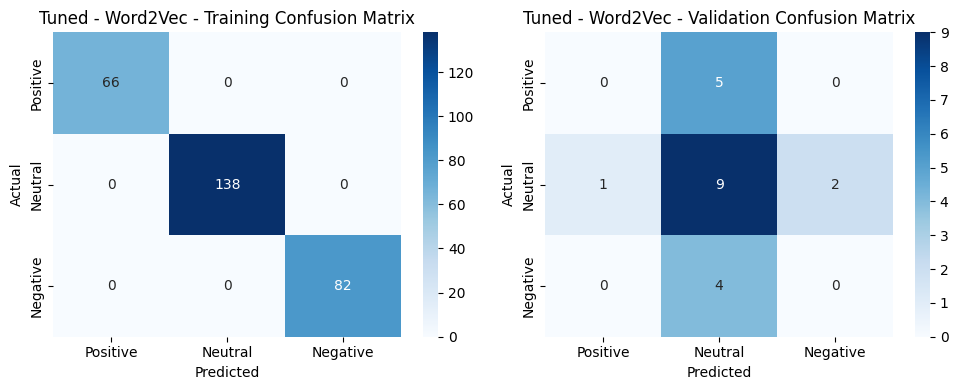

In [ ]:
# Plot confusion matrices
plot_confusion_matrices(y_train, y_train_pred_rf_wv, y_val, y_val_pred_rf_wv, "Tuned - Word2Vec")

In [ ]:
# Get performance metrics for Training
train_metrics = model_performance_classification_sklearn(tuned_rf_wv, X_train_wv, y_train, dataset="Training")

# Get performance metrics for Validation
val_metrics = model_performance_classification_sklearn(tuned_rf_wv, X_val_wv, y_val, dataset = "Validation")

# Combine the two DataFrames
combined_metrics_wv = pd.concat([train_metrics, val_metrics], ignore_index=True)

# Set the 'Dataset' column as the index if desired
combined_metrics_wv.set_index('Dataset', inplace=True)

# Display the combined metrics
print("Tuned Model-Word2Vec Training and Validation Metrics:\n", combined_metrics_wv)

Tuned Model-Word2Vec Training and Validation Metrics:
             Accuracy    Recall  Precision        F1
Dataset                                            
Training    1.000000  1.000000   1.000000  1.000000
Validation  0.428571  0.428571   0.285714  0.342857


In [ ]:
# Classification reports
report_rf_train_wv = classification_report(y_train, y_train_pred_rf_wv, output_dict=True)
report_rf_val_wv = classification_report(y_val, y_val_pred_rf_wv, output_dict=True)

# Create DataFrames
df_rf_train_wv = pd.DataFrame(report_rf_train_wv).T
df_rf_val_wv = pd.DataFrame(report_rf_val_wv).T

# Add a column for the dataset type
df_rf_train_wv['Dataset'] = 'Training'
df_rf_val_wv['Dataset'] = 'Validation'

# Reset index to create a proper multi-index
df_rf_train_wv.reset_index(inplace=True)
df_rf_val_wv.reset_index(inplace=True)

# Set multi-level index: Dataset type first, then the class labels
df_rf_train_wv.set_index(['Dataset', 'index'], inplace=True)
df_rf_val_wv.set_index(['Dataset', 'index'], inplace=True)

# Concatenate all the DataFrames into a single DataFrame for comparison
performance_df_wv = pd.concat([df_rf_train_wv, df_rf_val_wv])

# Round the values to 2 decimal places
performance_df_wv = performance_df_wv.round(2)

# Display the final DataFrame
print("\nTuned Model-Word2Vec Performance Classification:\n")
print(performance_df_wv)



Tuned Model-Word2Vec Performance Classification:

                         precision  recall  f1-score  support
Dataset    index                                             
Training   -1                 1.00    1.00      1.00    82.00
           0                  1.00    1.00      1.00   138.00
           1                  1.00    1.00      1.00    66.00
           accuracy           1.00    1.00      1.00     1.00
           macro avg          1.00    1.00      1.00   286.00
           weighted avg       1.00    1.00      1.00   286.00
Validation -1                 0.00    0.00      0.00     4.00
           0                  0.50    0.75      0.60    12.00
           1                  0.00    0.00      0.00     5.00
           accuracy           0.43    0.43      0.43     0.43
           macro avg          0.17    0.25      0.20    21.00
           weighted avg       0.29    0.43      0.34    21.00


### Tuned Model - GloVe

In [ ]:
import time

# Timer start
start = time.time()

# Perform Grid Search for Random Forest Classifier
print("Tuning Model - GloVe...")
rf_grid_gl = GridSearchCV(tuned_rf, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
rf_grid_gl.fit(X_train_gl, y_train)

# Timer end
end = time.time()
print("Time taken for tuning: ", (end-start), "seconds")

Tuning Model - GloVe...
Time taken for tuning:  178.84621906280518 seconds


In [ ]:
# Set the best models
tuned_rf_gl = rf_grid_gl.best_estimator_

# Fit the best models to the training data
tuned_rf_gl.fit(X_train_gl, y_train)

# Predictions on Training and Validation sets
y_train_pred_rf_gl = tuned_rf_gl.predict(X_train_gl)
y_val_pred_rf_gl = tuned_rf_gl.predict(X_val_gl)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred_rf_gl)
train_precision = precision_score(y_train, y_train_pred_rf_gl, average='weighted')
train_recall = recall_score(y_train, y_train_pred_rf_gl, average='weighted')
train_f1 = f1_score(y_train, y_train_pred_rf_gl, average='weighted')

# Validation metrics
val_accuracy = accuracy_score(y_val, y_val_pred_rf_gl)
val_precision = precision_score(y_val, y_val_pred_rf_gl, average='weighted')
val_recall = recall_score(y_val, y_val_pred_rf_gl, average='weighted')
val_f1 = f1_score(y_val, y_val_pred_rf_gl, average='weighted')


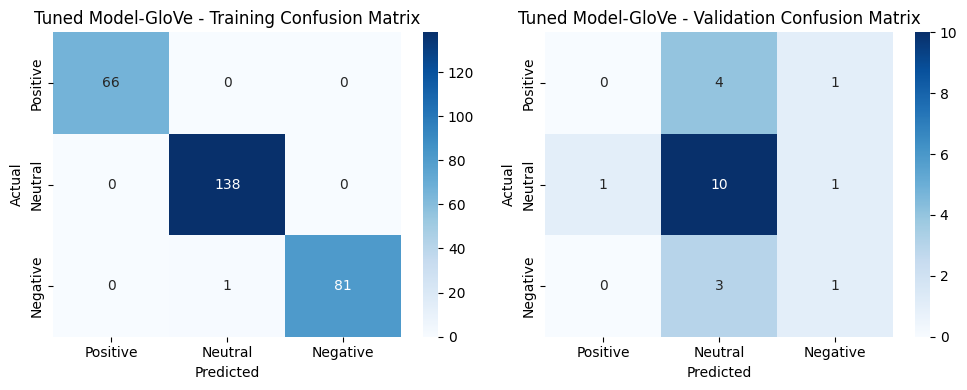

In [ ]:
# Plot confusion matrices
plot_confusion_matrices(y_train, y_train_pred_rf_gl, y_val, y_val_pred_rf_gl, "Tuned Model-GloVe")

In [ ]:
# Get performance metrics for Training
train_metrics = model_performance_classification_sklearn(tuned_rf_gl, X_train_gl, y_train, dataset="Training")

# Get performance metrics for Validation
val_metrics = model_performance_classification_sklearn(tuned_rf_gl, X_val_gl, y_val, dataset = "Validation")

# Combine the two DataFrames
combined_metrics_gl = pd.concat([train_metrics, val_metrics], ignore_index=True)

# Set the 'Dataset' column as the index if desired
combined_metrics_gl.set_index('Dataset', inplace=True)

# Display the combined metrics
print("Tuned Model - GloVe Training and Validation Metrics:\n", combined_metrics_gl)

Tuned Model - GloVe Training and Validation Metrics:
             Accuracy    Recall  Precision        F1
Dataset                                            
Training    0.996503  0.996503   0.996529  0.996499
Validation  0.523810  0.523810   0.399627  0.448510


In [ ]:
# Classification reports
report_rf_train_gl = classification_report(y_train, y_train_pred_rf_gl, output_dict=True)
report_rf_val_gl = classification_report(y_val, y_val_pred_rf_gl, output_dict=True)

# Create DataFrames
df_rf_train_gl = pd.DataFrame(report_rf_train_gl).T
df_rf_val_gl = pd.DataFrame(report_rf_val_gl).T

# Add a column for the dataset type
df_rf_train_gl['Dataset'] = 'Training'
df_rf_val_gl['Dataset'] = 'Validation'

# Reset index to create a proper multi-index
df_rf_train_gl.reset_index(inplace=True)
df_rf_val_gl.reset_index(inplace=True)

# Set multi-level index: Dataset type first, then the class labels
df_rf_train_gl.set_index(['Dataset', 'index'], inplace=True)
df_rf_val_gl.set_index(['Dataset', 'index'], inplace=True)

# Concatenate all the DataFrames into a single DataFrame for comparison
performance_df_gl = pd.concat([df_rf_train_gl, df_rf_val_gl])

# Round the values to 2 decimal places
performance_df_gl = performance_df_gl.round(2)

# Display the final DataFrame
print("\nTuned Model - GloVe Performance Classification:\n")
print(performance_df_gl)



Tuned Model - GloVe Performance Classification:

                         precision  recall  f1-score  support
Dataset    index                                             
Training   -1                 1.00    0.99      0.99    82.00
           0                  0.99    1.00      1.00   138.00
           1                  1.00    1.00      1.00    66.00
           accuracy           1.00    1.00      1.00     1.00
           macro avg          1.00    1.00      1.00   286.00
           weighted avg       1.00    1.00      1.00   286.00
Validation -1                 0.33    0.25      0.29     4.00
           0                  0.59    0.83      0.69    12.00
           1                  0.00    0.00      0.00     5.00
           accuracy           0.52    0.52      0.52     0.52
           macro avg          0.31    0.36      0.33    21.00
           weighted avg       0.40    0.52      0.45    21.00


### Tuned Model - Sentence Transformer

In [ ]:
import time

# Timer start
start = time.time()

# Perform Grid Search for Random Forest Classifier
print("Tuning Model - Sentence Transformer ...")
rf_grid_st = GridSearchCV(tuned_rf, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
rf_grid_st.fit(X_train_st, y_train)

# Timer end
end = time.time()
print("Time taken for tuning: ", (end-start), "seconds")

Tuning Model - Sentence Transformer ...
Time taken for tuning:  125.07450842857361 seconds


In [ ]:
# Set the best models
tuned_rf_st = rf_grid_st.best_estimator_

# Fit the best models to the training data
tuned_rf_st.fit(X_train_st, y_train)

# Predictions on Training and Validation sets
y_train_pred_rf_st = tuned_rf_st.predict(X_train_st)
y_val_pred_rf_st = tuned_rf_st.predict(X_val_st)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred_rf_st)
train_precision = precision_score(y_train, y_train_pred_rf_st, average='weighted')
train_recall = recall_score(y_train, y_train_pred_rf_st, average='weighted')
train_f1 = f1_score(y_train, y_train_pred_rf_st, average='weighted')

# Validation metrics
val_accuracy = accuracy_score(y_val, y_val_pred_rf_st)
val_precision = precision_score(y_val, y_val_pred_rf_st, average='weighted')
val_recall = recall_score(y_val, y_val_pred_rf_st, average='weighted')
val_f1 = f1_score(y_val, y_val_pred_rf_st, average='weighted')


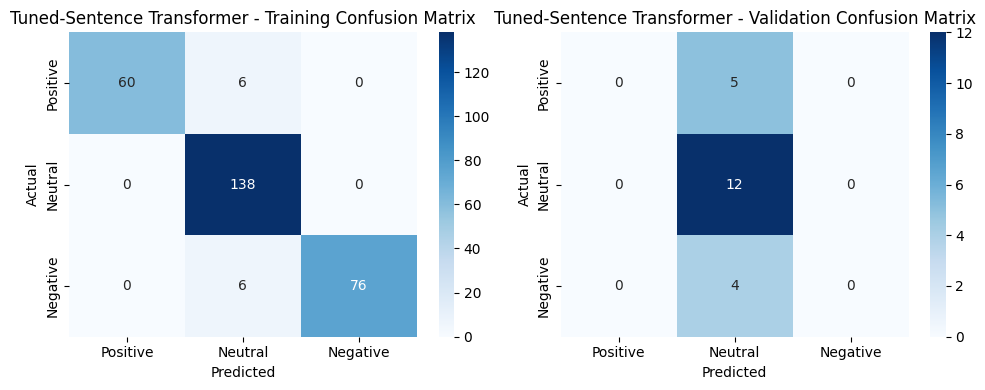

In [ ]:
# Plot confusion matrices
plot_confusion_matrices(y_train, y_train_pred_rf_st, y_val, y_val_pred_rf_st, "Tuned-Sentence Transformer")

In [ ]:
# Get performance metrics for Training
train_metrics = model_performance_classification_sklearn(tuned_rf_st, X_train_st, y_train, dataset="Training")

# Get performance metrics for Validation
val_metrics = model_performance_classification_sklearn(tuned_rf_st, X_val_st, y_val, dataset = "Validation")

# Combine the two DataFrames
combined_metrics_st = pd.concat([train_metrics, val_metrics], ignore_index=True)

# Set the 'Dataset' column as the index if desired
combined_metrics_st.set_index('Dataset', inplace=True)

# Display the combined metrics
print("Tuned- Sentence Transformer Training and Validation Metrics:\n", combined_metrics_st)

Tuned- Sentence Transformer Training and Validation Metrics:
             Accuracy    Recall  Precision        F1
Dataset                                            
Training    0.958042  0.958042   0.961399  0.958018
Validation  0.571429  0.571429   0.326531  0.415584


In [ ]:
# Classification reports
report_rf_train_st = classification_report(y_train, y_train_pred_rf_st, output_dict=True)
report_rf_val_st = classification_report(y_val, y_val_pred_rf_st, output_dict=True)

# Create DataFrames
df_rf_train_st = pd.DataFrame(report_rf_train_st).T
df_rf_val_st = pd.DataFrame(report_rf_val_st).T

# Add a column for the dataset type
df_rf_train_st['Dataset'] = 'Training'
df_rf_val_st['Dataset'] = 'Validation'

# Reset index to create a proper multi-index
df_rf_train_st.reset_index(inplace=True)
df_rf_val_st.reset_index(inplace=True)

# Set multi-level index: Dataset type first, then the class labels
df_rf_train_st.set_index(['Dataset', 'index'], inplace=True)
df_rf_val_st.set_index(['Dataset', 'index'], inplace=True)

# Concatenate all the DataFrames into a single DataFrame for comparison
performance_df_st = pd.concat([df_rf_train_st, df_rf_val_st])

# Round the values to 2 decimal places
performance_df_st = performance_df_st.round(2)

# Display the final DataFrame
print("\nTuned Model - Sentence Transformer Performance Classification:\n")
print(performance_df_st)



Tuned Model - Sentence Transformer Performance Classification:

                         precision  recall  f1-score  support
Dataset    index                                             
Training   -1                 1.00    0.93      0.96    82.00
           0                  0.92    1.00      0.96   138.00
           1                  1.00    0.91      0.95    66.00
           accuracy           0.96    0.96      0.96     0.96
           macro avg          0.97    0.95      0.96   286.00
           weighted avg       0.96    0.96      0.96   286.00
Validation -1                 0.00    0.00      0.00     4.00
           0                  0.57    1.00      0.73    12.00
           1                  0.00    0.00      0.00     5.00
           accuracy           0.57    0.57      0.57     0.57
           macro avg          0.19    0.33      0.24    21.00
           weighted avg       0.33    0.57      0.42    21.00


In [ ]:
combined_metrics_wv.shape, combined_metrics_gl.shape, combined_metrics_st.shape

((2, 5), (2, 5), (2, 5))

### Model Performance Summary and Final Model Selection

In [ ]:
# Assuming combined_metrics_wv, combined_metrics_gl, and combined_metrics_st have the same structure

# Add a new column to indicate the model type
combined_metrics_wv['Model'] = 'Tuned (Word2Vec)'
combined_metrics_gl['Model'] = 'Tuned (GloVe)'
combined_metrics_st['Model'] = 'Tuned (Sentence Transformer)'

# Append the DataFrames vertically
tuned_models_comp_df = pd.concat(
    [combined_metrics_wv,
     combined_metrics_gl,
     combined_metrics_st
    ],
    axis=0  # Concatenating vertically
).reset_index(drop=True)  # Reset index to avoid duplication

# Reorder columns to place 'Model' as the first column
tuned_models_comp_df = tuned_models_comp_df[['Model'] + [col for col in tuned_models_comp_df.columns if col != 'Model']]

# Display the comparison DataFrame
print("Tuned model performance comparison:")
print(tuned_models_comp_df.T)


Tuned model performance comparison:
                          0                 1              2              3  \
Model      Tuned (Word2Vec)  Tuned (Word2Vec)  Tuned (GloVe)  Tuned (GloVe)   
Dataset            Training        Validation       Training     Validation   
Accuracy                1.0          0.428571       0.996503        0.52381   
Recall                  1.0          0.428571       0.996503        0.52381   
Precision               1.0          0.285714       0.996529       0.399627   
F1                      1.0          0.342857       0.996499        0.44851   

                                      4                             5  
Model      Tuned (Sentence Transformer)  Tuned (Sentence Transformer)  
Dataset                        Training                    Validation  
Accuracy                       0.958042                      0.571429  
Recall                         0.958042                      0.571429  
Precision                      0.961399           

The **Tuned Model (GloVe)** stands out as the best choice overall, despite some degradation in validation performance. It offers a solid balance between high training performance and reasonable validation results, making it less prone to overfitting than the Word2Vec model.

It achieves the highest validation accuracy and F1-score among the three models, indicating its capability to generalize better on unseen data. High precision and recall also suggest it can effectively identify positive instances while minimizing false positives and false negatives.

### Model Performance Check on Test Data

In [ ]:
# Set the best models
tuned_rf_gl = rf_grid_gl.best_estimator_

# Fit the best models to the test data
tuned_rf_gl.fit(X_train_gl, y_train)

# Predictions on Training and Validation sets
y_train_pred_rf_gl = tuned_rf_gl.predict(X_train_gl)
y_test_pred_rf_gl = tuned_rf_gl.predict(X_test_gl)

# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred_rf_gl)
train_precision = precision_score(y_train, y_train_pred_rf_gl, average='weighted')
train_recall = recall_score(y_train, y_train_pred_rf_gl, average='weighted')
train_f1 = f1_score(y_train, y_train_pred_rf_gl, average='weighted')

# Validation metrics
test_accuracy = accuracy_score(y_test, y_test_pred_rf_gl)
test_precision = precision_score(y_test, y_test_pred_rf_gl, average='weighted')
test_recall = recall_score(y_test, y_test_pred_rf_gl, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_rf_gl, average='weighted')

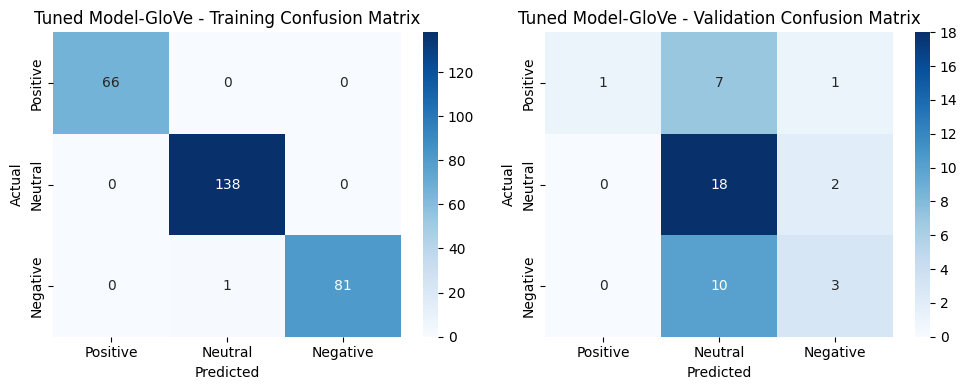

In [ ]:
# Plot confusion matrices
plot_confusion_matrices(y_train, y_train_pred_rf_gl, y_test, y_test_pred_rf_gl, "Tuned Model-GloVe")

In [ ]:
# Get performance metrics for Training
train_metrics = model_performance_classification_sklearn(tuned_rf_gl, X_train_gl, y_train, dataset="Training")

# Get performance metrics for Validation
test_metrics = model_performance_classification_sklearn(tuned_rf_gl, X_test_gl, y_test, dataset = "Test")

# Combine the two DataFrames
combined_metrics_gl_testdata = pd.concat([train_metrics, test_metrics], ignore_index=True)

# Set the 'Dataset' column as the index if desired
combined_metrics_gl_testdata.set_index('Dataset', inplace=True)

# Display the combined metrics
print("Tuned Model - GloVe Training and Test Metrics:\n", combined_metrics_gl_testdata)

Tuned Model - GloVe Training and Test Metrics:
           Accuracy    Recall  Precision        F1
Dataset                                          
Training  0.996503  0.996503   0.996529  0.996499
Test      0.523810  0.523810   0.613946  0.452290


In [ ]:
# Classification reports
report_rf_train_gl = classification_report(y_train, y_train_pred_rf_gl, output_dict=True)
report_rf_test_gl = classification_report(y_test, y_test_pred_rf_gl, output_dict=True)

# Create DataFrames
df_rf_train_gl = pd.DataFrame(report_rf_train_gl).T
df_rf_test_gl = pd.DataFrame(report_rf_test_gl).T

# Add a column for the dataset type
df_rf_train_gl['Dataset'] = 'Training'
df_rf_test_gl['Dataset'] = 'Test'

# Reset index to create a proper multi-index
df_rf_train_gl.reset_index(inplace=True)
df_rf_test_gl.reset_index(inplace=True)

# Set multi-level index: Dataset type first, then the class labels
df_rf_train_gl.set_index(['Dataset', 'index'], inplace=True)
df_rf_test_gl.set_index(['Dataset', 'index'], inplace=True)

# Concatenate all the DataFrames into a single DataFrame for comparison
performance_df_gl_test = pd.concat([df_rf_train_gl, df_rf_test_gl])

# Round the values to 2 decimal places
performance_df_gl_test = performance_df_gl_test.round(2)

# Display the final DataFrame
print("\nTuned Model - GloVe Performance Classification:\n")
print(performance_df_gl_test)



Tuned Model - GloVe Performance Classification:

                       precision  recall  f1-score  support
Dataset  index                                             
Training -1                 1.00    0.99      0.99    82.00
         0                  0.99    1.00      1.00   138.00
         1                  1.00    1.00      1.00    66.00
         accuracy           1.00    1.00      1.00     1.00
         macro avg          1.00    1.00      1.00   286.00
         weighted avg       1.00    1.00      1.00   286.00
Test     -1                 0.50    0.23      0.32    13.00
         0                  0.51    0.90      0.65    20.00
         1                  1.00    0.11      0.20     9.00
         accuracy           0.52    0.52      0.52     0.52
         macro avg          0.67    0.41      0.39    42.00
         weighted avg       0.61    0.52      0.45    42.00


The tuned GloVe model achieved high performance on the training dataset, with near-perfect precision, recall, and F1-scores for all classes. However, the performance on the test dataset was significantly lower, especially for classes -1 and 1. The model struggled with correctly identifying these classes, leading to lower precision and recall. Overall, the model's performance on the test dataset is moderate, indicating potential overfitting on the training data.

# **Weekly News Summarization**

**Important Note**: This section of the project is completed independently from the previous sections in order to avoid runtime crashes due to RAM overload.

#### Installing and Importing the necessary libraries

In [ ]:
# Installation for GPU llama-cpp-python
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.2.45 --force-reinstall --no-cache-dir -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.7/36.7 MB 112.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 175.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.3/133.3 kB 250.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 272.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.1.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.1.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have nu

In [ ]:
# Installation for CPU llama-cpp-python
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

In [ ]:
# For downloading the models from HF Hub
!pip install huggingface_hub>=0.21.0 -q

In [ ]:
# Importing the library for data manipulation
import pandas as pd
import numpy as np

# Importing the library for downloading the models from HF Hub
from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module
from llama_cpp import Llama

from tqdm import tqdm # For progress bar related functionalities
tqdm.pandas()

# Importing the json module
import json

#### Loading the data

In [ ]:
# Setting google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/MLProject_6/'


In [ ]:
import pandas as pd
stock_news = pd.read_csv(file_path + 'stock_news.csv')
data = stock_news.copy()
data.head()

,Date,News,Open,High,Low,Close,Volume,Label
0,2019-01-02,The tech sector experienced a significant dec...,41.740002,42.244999,41.482498,40.246914,130672400,-1
1,2019-01-02,Apple lowered its fiscal Q1 revenue guidance ...,41.740002,42.244999,41.482498,40.246914,130672400,-1
2,2019-01-02,Apple cut its fiscal first quarter revenue fo...,41.740002,42.244999,41.482498,40.246914,130672400,-1
3,2019-01-02,This news article reports that yields on long...,41.740002,42.244999,41.482498,40.246914,130672400,-1
4,2019-01-02,Apple's revenue warning led to a decline in U...,41.740002,42.244999,41.482498,40.246914,130672400,-1


Loading the model (Llama)

In [ ]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGUF"
model_basename = "llama-2-13b-chat.Q5_K_M.gguf" # the model is in gguf format

In [ ]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,
    filename=model_basename
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2,  # CPU cores
    n_batch=512,  # Should be between 1 and n_ctx, considering the amount of VRAM in GPU.
    n_gpu_layers= 100,  # Value can be changed based on GPU VRAM pool.
    n_ctx=4500,  # Context window
)

llama_model_loader: loaded meta data with 19 key-value pairs and 363 tensors from /root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGUF/snapshots/4458acc949de0a9914c3eab623904d4fe999050a/llama-2-13b-chat.Q5_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 5120
llama_model_loader: - kv   4:                          llama.block_count u32              = 40
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 13824
llama_model_loader: - kv   6:                 llama.rope.dimension_

#### Loading the model (Mistral)

In [ ]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

model_path = hf_hub_download(
    repo_id=model_name_or_path,  # Using model_name_or_path as the repo_id
    filename=model_basename      # Using model_basename as the filename
)

In [ ]:
# The runtime is connected to GPU.
llm = Llama(
    model_path=model_path, # Path to the model
    n_ctx=4096, #Context window
)

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loade

#### Aggregating the data weekly

In [ ]:
# Convert the 'Date' column to datetime format.
data["Date"] = pd.to_datetime(data['Date'])

In [ ]:
# Group the data by week using the 'Date' column.
weekly_grouped = data.groupby(pd.Grouper(key='Date', freq='W'))

In [ ]:
# Aggregate the grouped data on a weekly basis:
# concatenate 'content' values into a single string separated by ' || '.
weekly_grouped = weekly_grouped.agg(
    {
        'News': lambda x: ' || '.join(x)  # Join the news values with ' || ' separator.
    }
).reset_index()

print(weekly_grouped.shape)

(18, 2)


In [ ]:
weekly_grouped

,Date,News
0,2019-01-06,The tech sector experienced a significant dec...
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...
2,2019-01-20,The U.S. stock market declined on Monday as c...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre..."
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...
5,2019-02-10,"The Dow Jones Industrial Average, S&P 500, an..."
6,2019-02-17,"This week, the European Union's second highes..."
7,2019-02-24,This news article discusses progress towards ...
8,2019-03-03,The Dow Jones Industrial Average and other ma...
9,2019-03-10,"Spotify, the world's largest paid music strea..."


In [ ]:
# creating a copy of the data
data_1 = weekly_grouped.copy()

#### Summarization

**Note**:

- The model is expected to summarize the news from the week by identifying the top three positive and negative events that are most likely to impact the price of the stock.

- As an output, the model is expected to return a JSON containing two keys, one for Positive Events and one for Negative Events.

For the project, we need to define the prompt to be fed to the LLM to help it understand the task to perform. The following should be the components of the prompt:

1. **Role**: Specifies the role the LLM will be taking up to perform the specified task, along with any specific details regarding the role

  - **Example**: `You are an expert data analyst specializing in news content analysis.`

2. **Task**: Specifies the task to be performed and outlines what needs to be accomplished, clearly defining the objective

  - **Example**: `Analyze the provided news headline and return the main topics contained within it.`

3. **Instructions**: Provides detailed guidelines on how to perform the task, which includes steps, rules, and criteria to ensure the task is executed correctly

  - **Example**:

```
Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.
```

4. **Output Format**: Specifies the format in which the final response should be structured, ensuring consistency and clarity in the generated output

  - **Example**: `Return the output in JSON format with keys as the topic number and values as the actual topic.`

**Full Prompt Example**:

```
You are an expert data analyst specializing in news content analysis.

Task: Analyze the provided news headline and return the main topics contained within it.

Instructions:
1. Read the news headline carefully.
2. Identify the main subjects or entities mentioned in the headline.
3. Determine the key events or actions described in the headline.
4. Extract relevant keywords that represent the topics.
5. List the topics in a concise manner.

Return the output in JSON format with keys as the topic number and values as the actual topic.
```

**Sample Output**:

`{"1": "Politics", "2": "Economy", "3": "Health" }`

##### Utility Functions

In [ ]:
# Defining a function to parse the JSON output from the model
def extract_json_data(json_str):
    import json
    try:
        # Find the indices of the opening and closing curly braces
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

##### Defining the response function

In [ ]:
def generate_response_llama(prompt, news):

    # System message explicitly instructing not to include the review text
    system_message = """
        [INST]
        {}
        [/INST]
    """.format(prompt)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"{news}\n{system_message}"

    # Generate a response from the LLaMA model
    response = lcpp_llm(
        prompt=prompt,
        max_tokens=4096,
        temperature=0,
        top_p=0.95,
        repeat_penalty=1.2,
        top_k=50,
        stop=['INST'],
        echo=False,
        seed=42,
    )

    # Extract the sentiment from the response
    response_text = response["choices"][0]["text"]
    return response_text

In [ ]:
def response_mistral_1(prompt, news):
    model_output = llm(
      f"""
      [INST]
      {prompt}
      News Articles: {news}
      [/INST]
      """,
      max_tokens=500,  # Limit output length to a reasonable number of tokens
      temperature=0.7,  # Controls randomness; 0.7 is often a good middle ground
      top_p=0.9,  # Controls diversity in sampling; 0.9 is standard
      top_k=50,  # Limits number of tokens to consider for the next step in generation
      echo=False,
    )

    final_output = model_output["choices"][0]["text"]

    return final_output

##### Checking the model output on a sample

In [ ]:
news = data_1.loc[0, 'News']

In [ ]:
print(len(news.split(' ')))
news

2611


' The tech sector experienced a significant decline in the aftermarket following Apple\'s Q1 revenue warning. Notable suppliers, including Skyworks, Broadcom, Lumentum, Qorvo, and TSMC, saw their stocks drop in response to Apple\'s downward revision of its revenue expectations for the quarter, previously announced in January. ||  Apple lowered its fiscal Q1 revenue guidance to $84 billion from earlier estimates of $89-$93 billion due to weaker than expected iPhone sales. The announcement caused a significant drop in Apple\'s stock price and negatively impacted related suppliers, leading to broader market declines for tech indices such as Nasdaq 10 ||  Apple cut its fiscal first quarter revenue forecast from $89-$93 billion to $84 billion due to weaker demand in China and fewer iPhone upgrades. CEO Tim Cook also mentioned constrained sales of Airpods and Macbooks. Apple\'s shares fell 8.5% in post market trading, while Asian suppliers like Hon ||  This news article reports that yields o

In [ ]:
prompt = """
You are a financial analyst specializing in stock market news analysis.

Task: Analyze the following weekly stock-related news articles and identify the top three positive and negative events that are most likely to impact stock prices. Focus on news affecting company performance, market trends, investor sentiment, and financial health.

Instructions:
1. Carefully read all the articles for the week.
2. Identify the most significant positive and negative events from the news.
3. Rank these events based on their potential impact on stock prices.
4. Return the results as two categories: Positive Events and Negative Events, each containing a maximum of three key events.

Output Format: Return the output in JSON format with keys 'Positive Events' and 'Negative Events'. Each should contain a list of key events.
"""


In [ ]:
data_1['Key_Events'] = data_1['News'].progress_apply(lambda x: response_mistral_1(prompt, x))

  0%|          | 0/18 [00:00<?, ?it/s]
llama_print_timings:        load time =    6848.22 ms
llama_print_timings:      sample time =     133.36 ms /   160 runs   (    0.83 ms per token,  1199.79 tokens per second)
llama_print_timings: prompt eval time =   86742.33 ms /  3936 tokens (   22.04 ms per token,    45.38 tokens per second)
llama_print_timings:        eval time =  211830.71 ms /   159 runs   ( 1332.27 ms per token,     0.75 tokens per second)
llama_print_timings:       total time =  299764.83 ms /  4095 tokens
 11%|█         | 2/18 [04:59<39:58, 149.90s/it]Llama.generate: prefix-match hit

llama_print_timings:        load time =    6848.22 ms
llama_print_timings:      sample time =     327.25 ms /   490 runs   (    0.67 ms per token,  1497.34 tokens per second)
llama_print_timings: prompt eval time =   40717.49 ms /  2234 tokens (   18.23 ms per token,    54.87 tokens per second)
llama_print_timings:        eval time =  531530.43 ms /   489 runs   ( 1086.97 ms per token,     0

In [ ]:
# Extract and display the first 5 rows of the 'Key Events' column
data_1["Key_Events"].head()

,Key_Events
0,"{\n ""Positive Events"": [\n ..."
1,"{\n ""Positive Events"": [\n ..."
2,"{\n ""Positive Events"": [\n ..."
3,"{\n ""Positive Events"": [\n {\..."
4,"{\n ""Positive Events"": [\n ..."


In [ ]:
# Parse the model output
data_1['model_response_parsed'] = data_1['Key_Events'].apply(extract_json_data)
data_1.head()

Error parsing JSON: Expecting ',' delimiter: line 11 column 13 (char 568)


,Date,News,Key_Events,model_response_parsed
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""Positive Events"": [\n ...",{}
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""Positive Events"": [\n ...",{'Positive Events': [{'Description': 'Sprint a...
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""Positive Events"": [\n ...",{'Positive Events': [{'Event': 'Netflix announ...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""Positive Events"": [\n {\...",{'Positive Events': [{'Event': 'IBM's better-t...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""Positive Events"": [\n ...",{'Positive Events': [{'Description': 'Apple re...


In [ ]:
# Normalize the parsed output and concatenate it with the original dataframe
model_response_parsed = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed.head()

,Positive Events,Negative Events
0,NaN,NaN
1,[{'Description': 'Sprint and Samsung plan to r...,"[{'Description': 'Geely, China's most successf..."
2,[{'Event': 'Netflix announced a price increase...,[{'Event': 'China's unexpected drops in export...
3,[{'Event': 'IBM's better-than-expected earning...,[{'Event': 'Swiss National Bank's necessity of...
4,[{'Description': 'Apple reported spending over...,[{'Description': 'Caterpillar Inc reported low...


In [ ]:
final_output = pd.concat([data_1.reset_index(drop=True), model_response_parsed], axis=1)

# Dropping unnecessary columns and renaming them for clarity
final_output.drop(['Key_Events', 'model_response_parsed'], axis=1, inplace=True)
final_output.columns = ['Week_End_Date', 'News', 'Week_Positive_Events', 'Week_Negative_Events']

# Display the final result
final_output.head()


,Week_End_Date,News,Week_Positive_Events,Week_Negative_Events
0,2019-01-06,The tech sector experienced a significant dec...,NaN,NaN
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,[{'Description': 'Sprint and Samsung plan to r...,"[{'Description': 'Geely, China's most successf..."
2,2019-01-20,The U.S. stock market declined on Monday as c...,[{'Event': 'Netflix announced a price increase...,[{'Event': 'China's unexpected drops in export...
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...",[{'Event': 'IBM's better-than-expected earning...,[{'Event': 'Swiss National Bank's necessity of...
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,[{'Description': 'Apple reported spending over...,[{'Description': 'Caterpillar Inc reported low...


#### Sentiment Analysis

In [ ]:
# defining the instructions for the model
prompt_1 = """
    You are an AI analyzing news. Classify the sentiment of the provided news into the following categories:
    - Positive
    - Negative
    - Neutral
"""

In [ ]:
data_1['model_response'] = data_1['News'].apply(lambda x: response_mistral_1(prompt_1, x))

Llama.generate: prefix-match hit

llama_print_timings:        load time =    6848.22 ms
llama_print_timings:      sample time =     193.96 ms /   295 runs   (    0.66 ms per token,  1520.94 tokens per second)
llama_print_timings: prompt eval time =   39743.89 ms /  1231 tokens (   32.29 ms per token,    30.97 tokens per second)
llama_print_timings:        eval time =  375533.15 ms /   294 runs   ( 1277.32 ms per token,     0.78 tokens per second)
llama_print_timings:       total time =  417625.10 ms /  1525 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =    6848.22 ms
llama_print_timings:      sample time =     315.18 ms /   500 runs   (    0.63 ms per token,  1586.39 tokens per second)
llama_print_timings: prompt eval time =   37847.87 ms /  2234 tokens (   16.94 ms per token,    59.03 tokens per second)
llama_print_timings:        eval time =  532068.68 ms /   499 runs   ( 1066.27 ms per token,     0.94 tokens per second)
llama_print_timings:       to

In [ ]:
data_1['model_response'].head()

,model_response
0,"Based on the provided news articles, the sent..."
1,1. Positive:\n * Sprint and Samsung pl...
2,Based on the information provided in the news...
3,1. Switzerland: Neutral - The news reports abo...
4,1. Negative: Caterpillar's lower-than-expected...


In [ ]:
i = 3
print(data_1.loc[i, 'News'])

 The Swiss National Bank (SNB) governor, Andrea Maechler, stated that negative interest rates and foreign currency market intervention are necessary to prevent a strong Swiss franc from causing deflation in the country. She emphasized that price stability is the bank's mandate, and the exchange rate significantly impacts monetary conditions and inflation. Switzerland, ||  The Dow, S&P 500, and Nasdaq experienced significant losses on Tuesday despite White House economic adviser Lawrence Kudlow denying reports that trade talks between the U.S. and China had been canceled. The International Monetary Fund's bearish outlook on global growth and weak existing home sales data also ||  IBM's stock price increased after hours due to better-than-expected earnings and revenue, with its cloud computing business contributing positively. ||  Huawei is expanding its presence in Europe with the launch of the new Honor View20 smartphone, which offers advanced camera features at a lower price point tha

In [ ]:
print(data_1.loc[i, 'model_response'])

1. Switzerland: Neutral - The news reports about the Swiss National Bank's actions and statements are neutral in tone, focusing on facts and information without expressing a positive or negative sentiment.
      2. US Stock Markets and Trade Talks: Negative - The news reports about significant losses in the US stock markets and ongoing trade tensions between the US and China have a negative sentiment, expressing concerns and potential negative impacts on the economy and specific companies.
      3. IBM Earnings and Huawei Expansion: Positive - The news reports about IBM's better-than-expected earnings and revenue, as well as Huawei's expansion in Europe and affordable new smartphone offering, have a positive sentiment, expressing optimism and success.
      4. Foxconn Recruitment and Amazon's Entry in Brazil: Neutral - The news reports about Foxconn's recruitment efforts and Amazon's entry in Brazil are neutral in tone, focusing on facts and information without expressing a positive or

In [ ]:
def extract_sentiment(model_response):
    if 'positive' in model_response.lower():
        return 'Positive'
    elif 'negative' in model_response.lower():
        return 'Negative'
    elif 'neutral' in model_response.lower():
        return 'Neutral'

In [ ]:
# applying the function to the model response
data_1['sentiment'] = data_1['model_response'].apply(extract_sentiment)
data_1['sentiment'].head()

,sentiment
0,Positive
1,Positive
2,Positive
3,Positive
4,Positive


In [ ]:
data_1['sentiment'].value_counts()

,count
sentiment,
Positive,18


In [ ]:
final_data_1 = data_1.drop(['model_response'], axis=1)
final_data_1.head()

,Date,News,Key_Events,model_response_parsed,sentiment
0,2019-01-06,The tech sector experienced a significant dec...,"{\n ""Positive Events"": [\n ...",{},Positive
1,2019-01-13,Sprint and Samsung plan to release 5G smartph...,"{\n ""Positive Events"": [\n ...",{'Positive Events': [{'Description': 'Sprint a...,Positive
2,2019-01-20,The U.S. stock market declined on Monday as c...,"{\n ""Positive Events"": [\n ...",{'Positive Events': [{'Event': 'Netflix announ...,Positive
3,2019-01-27,"The Swiss National Bank (SNB) governor, Andre...","{\n ""Positive Events"": [\n {\...",{'Positive Events': [{'Event': 'IBM's better-t...,Positive
4,2019-02-03,Caterpillar Inc reported lower-than-expected ...,"{\n ""Positive Events"": [\n ...",{'Positive Events': [{'Description': 'Apple re...,Positive


## **Conclusions and Recommendations**

### Conclusions

1. **Data Quality and Distribution:**
   - The dataset consists of 349 observations with no missing values or duplicates.
   - The target labels, indicating sentiment (-1: Negative, 0: Neutral, 1: Positive), show an imbalanced distribution, with the neutral category (0) having the highest frequency, followed by negative (-1) and positive (1).
   - The stock price variables (Open, High, Low, Close) exhibit right-skewed distributions, with slightly different variances, especially in the Close prices.
   - Volume and news length (word count) distributions also show right-skewness, with most news articles having a word count between 45 to 55, and stock trading volume peaking around 1.00e8.
   - There is high correlation between stock price variables, indicating that these features may be redundant, while news length and trading volume are not strongly correlated with stock prices or sentiment labels.

2. **Stock Price Trends:**
   - The stock price variables display volatility over time, with the High and Low prices being the most variable. Open and Close prices are generally closer together.
   - A general upward trend in stock prices is observed during the time period (January to April 2019), while trading volumes fluctuate without a strong correlation to price movements.

3. **Model Performance:**
   - The models used (Random Forest, Gradient Boosting, Decision Tree) performed well on the training set but showed significantly lower performance on the validation set, indicating overfitting.
   - The tuned **GloVe** model achieved the best validation accuracy and F1-score among all models, making it the most promising for real-world applications, despite its reduced performance on the test set.
   - The model's struggles with classifying -1 (Negative) and 1 (Positive) labels on the test dataset suggest room for improvement in capturing rare or extreme sentiment changes.

4. **Key Insights:**
   - The imbalanced dataset and the high correlation between stock price variables suggest that additional feature engineering, data balancing techniques, or feature selection may improve model performance.
   - The neutral label dominates the dataset, which could influence model bias toward predicting neutral sentiment. This imbalance should be addressed for better model generalization.


### Recommendations

1. **Improve Model Generalization:**
   - To address the issue of overfitting, consider increasing the dataset size by incorporating additional news data, extending the time period, or using external sources for stock price data.
   - Balancing the dataset by employing techniques like SMOTE or undersampling the dominant class (neutral) could improve the model’s ability to accurately predict minority classes (-1 and 1).

2. **Feature Engineering:**
   - The strong correlations between stock price variables (Open, High, Low, Close) suggest potential feature redundancy. Dimensionality reduction techniques can help reduce the complexity of the model and improve performance.
   - Additionally, creating new features such as percentage change in stock price, price volatility, or time-lagged features could help capture more intricate relationships between stock prices and news sentiment.

3. **Handling Imbalanced Labels:**
   - Given the dominance of neutral sentiment (0), it's important to adjust the model to prevent bias toward predicting neutral sentiment. Weighted loss functions or class-specific penalties during training can help address this imbalance.
   - Consider re-evaluating how sentiment is labeled, as the current labeling may not fully capture subtle sentiment shifts that affect stock prices.

4. **Investment Strategy Integration:**
   - Despite the challenges in accurately predicting sentiment labels, the GloVe-based model shows promise in providing insight into the sentiment behind news articles. This can be leveraged for investment strategies by focusing on identifying the most impactful positive and negative news events.
   - Use the model’s predictions to track changes in sentiment over time and correlate them with stock performance, potentially identifying buying or selling opportunities based on sentiment shifts.

5. **Further Optimization:**
   - While the GloVe model performs better than Word2Vec, further tuning of hyperparameters and model architecture could yield improvements.

With the consideration of these recommendations, the model can be more robust for predicting sentiment-driven stock price movements and provide valuable insights for informed investment decisions.

#### Converting the notebook to html

In [ ]:
from nbconvert import HTMLExporter
import nbformat

file_path = '/content/drive/MyDrive/MLProject_6/'
notebook_name = 'NLP_Project_Full_Code.ipynb'

# Load the notebook
notebook_file = file_path + notebook_name
with open(notebook_file) as f:
    notebook_content = nbformat.read(f, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
body, resources = html_exporter.from_notebook_node(notebook_content)

# Save the HTML file
with open('output.html', 'w') as f:
    f.write(body)